# 3. Redes Neurais *Feedforward*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix 
from neupy import algorithms, layers
from neupy.init import Constant

C:\ProgramData\Anaconda3\envs\neupy\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\neupy\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\neupy\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\neupy\lib\site-packages\tensorflow\python\f

## 3.1 Dataset

In [2]:
X = np.loadtxt('datasets/X.txt',delimiter=',')
y = np.loadtxt('datasets/Y_cla.txt')
y = y.reshape(len(y),1)

In [3]:
print(X.shape)
print(y.shape)

(649, 34)
(649, 1)


Divisão do dataset nos conjunto de treinamento (60%), validação(20%) e teste(20%):

In [4]:
X_tr, X_val_te, y_tr, y_val_te = train_test_split(X, y, test_size = 0.4, shuffle=False)
X_val, X_te, y_val, y_te = train_test_split(X_val_te, y_val_te, test_size = 0.5, shuffle=False)
print(X_tr.shape)
print(y_tr.shape)
print(X_val.shape)
print(y_val.shape)
print(X_te.shape)
print(y_te.shape)

(389, 34)
(389, 1)
(130, 34)
(130, 1)
(130, 34)
(130, 1)


## 3.2 Definição das Arquiteturas

Inicialmente, iremos avaliar arquiteturas com apenas uma camada oculta

In [14]:
_, tamI = X_tr.shape 
H = [5, 10, 50, 100]

NN = []

for h in H:
    nn = layers.join(
        layers.Input(tamI),
        layers.Tanh(h),
        layers.Tanh(1),
    )
    NN.append(nn)

In [15]:
NN[1].get_params()

{'forward_graph': OrderedDict([(Input(34, name='input-6'),
               [Tanh(10, weight=HeNormal(gain=1.0), bias=Constant(0), name='tanh-11')]),
              (Tanh(10, weight=HeNormal(gain=1.0), bias=Constant(0), name='tanh-11'),
               [Tanh(1, weight=HeNormal(gain=1.0), bias=Constant(0), name='tanh-12')]),
              (Tanh(1, weight=HeNormal(gain=1.0), bias=Constant(0), name='tanh-12'),
               [])])}

### Otimizadores

In [16]:
opt1 = algorithms.GradientDescent(NN[1], step=0.1, loss='mse', shuffle_data=False, show_epoch=10, verbose=True, batch_size=None)


Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = None
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 10
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/tanh-12:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 0.16 seconds


In [17]:
#opt1 = algorithms.Momentum(NN[2], loss='mse', momentum=0.99, step=0.01, shuffle_data=False, verbose=True, batch_size=None)
#opt1 = algorithms.LevenbergMarquardt(NN[2], loss='mse', shuffle_data=False, verbose=True)
#opt1 = algorithms.GradientDescent(NN[2], step=0.1, loss='mse', shuffle_data=False, show_epoch=5, verbose=False, batch_size=None)

In [18]:
opt1.train(X_tr, y_tr, X_val, y_val, epochs=100)

#1 : [64 ms] train: 2.699693, valid: 1.174610
#10 : [997 μs] train: 0.638849, valid: 1.033638
#20 : [997 μs] train: 0.598533, valid: 0.998590
#30 : [2 ms] train: 0.559566, valid: 0.974901
#40 : [998 μs] train: 0.526392, valid: 0.948356
#50 : [2 ms] train: 0.496914, valid: 0.919655
#60 : [3 ms] train: 0.474188, valid: 0.892741
#70 : [2 ms] train: 0.462128, valid: 0.939659
#80 : [996 μs] train: 0.482687, valid: 1.069601
#90 : [997 μs] train: 0.463659, valid: 0.991798
#100 : [998 μs] train: 0.454548, valid: 0.965293


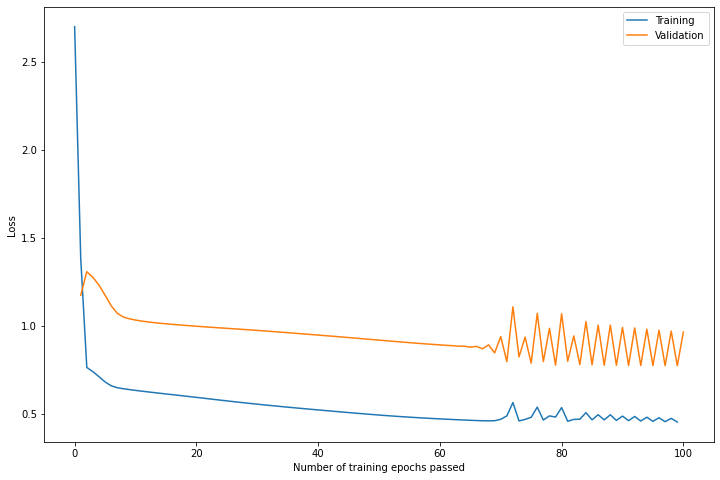

In [19]:
opt1.plot_errors()

In [20]:
g = np.sign(opt1.predict(X_val))

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix 
Acc = accuracy_score(y_val,g)
Cm = confusion_matrix(y_val,g)
print("Acurácia:", Acc)
print("Matriz de confusão:")
print(Cm)

Acurácia: 0.6846153846153846
Matriz de confusão:
[[ 6 40]
 [ 1 83]]


In [22]:
X_tr[-1]

array([-1.        , -1.        ,  1.        ,  1.        ,  1.        ,
       -1.        ,  1.        ,  1.        , -1.        ,  3.        ,
        3.        ,  1.        ,  2.        ,  0.        ,  5.        ,
        3.        ,  4.        ,  1.        ,  1.        ,  4.        ,
        1.03169516,  0.93602618, -1.        , -1.        , -1.        ,
        1.        , -1.        , -1.        ,  1.        , -1.        ,
       -1.        , -1.        ,  1.        , -1.        ])